In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv',header=None)

In [4]:
df.head()

,0
0,0.467053
1,-1.066558
2,1.946904
3,-0.956927
4,-1.556807


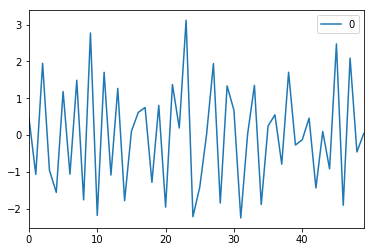

In [5]:
df[:50].plot()
plt.show()

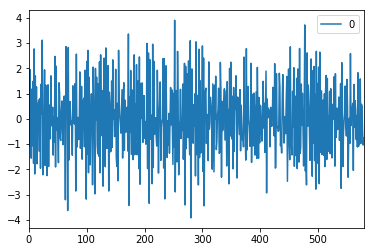

In [6]:
df.plot()
plt.show()

In [7]:
cut = 550
end = len(df)

In [8]:
X=df.as_matrix().squeeze()[:cut]

In [9]:
Y=df.as_matrix().squeeze()[cut:]

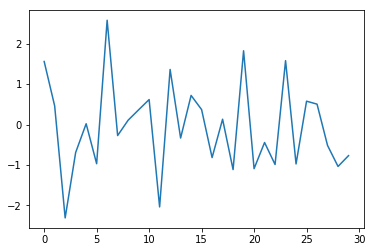

In [10]:
plt.plot(Y)

In [11]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

D:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 自相关偏相关系数图

https://en.wikipedia.org/wiki/Autocorrelation

有的白噪声检验就是直接检验“所有”自相关系数是不是显著不等于0

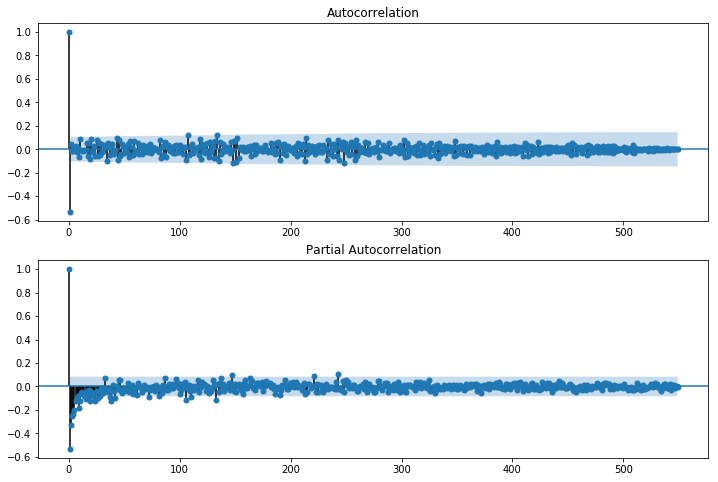

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(X, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(X, ax=ax2)


# 白噪声检验

Ljung–Box test：https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test

In [13]:
from statsmodels.stats import diagnostic as diag


In [14]:
lbvalue, pvalue = diag.acorr_ljungbox(X)

In [15]:
pvalue

array([8.11571679e-36, 7.28962486e-35, 6.66110737e-34, 4.99511300e-33,
       3.07106292e-32, 1.52510651e-31, 6.98674080e-31, 3.41192804e-30,
       4.53505274e-30, 2.65614485e-30, 1.10990372e-29, 4.03099515e-29,
       1.47051977e-28, 5.35751275e-28, 1.87462004e-27, 2.81612546e-27,
       3.47623214e-27, 5.43891270e-27, 2.66131242e-27, 1.24611297e-27,
       3.38885231e-27, 8.73989812e-27, 1.98605445e-26, 2.43432417e-26,
       1.43149288e-26, 1.59113278e-26, 2.01967100e-26, 2.86146372e-26,
       5.00775219e-26, 1.13733619e-25, 2.77065968e-25, 5.29708525e-25,
       1.10414525e-24, 2.17267627e-25, 2.60129739e-25, 5.98335331e-25,
       8.51352163e-25, 1.62146735e-24, 2.43125076e-24, 4.88254827e-24])

各个$h$取值对应的p值均十分接近0（小于0.01）,拒绝白噪声假设。

# 搜索最优ARMA参数

拟合ARMA模型：https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model



In [16]:
m,n = 6,6
aic_mat = np.ones((m,n)) * np.inf
bic_mat = np.ones((m,n)) * np.inf

setting 0 0
setting 0 1
[-1.58009925e-05 -9.99999978e-01]
aic: 1574.67608918822 bic: 1587.6058440228994


D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


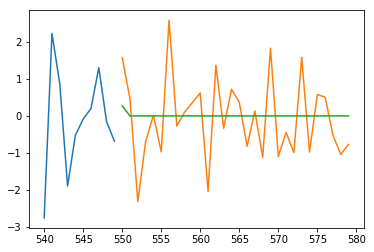

setting 0 2
invaild setting skip
setting 0 3
invaild setting skip
setting 0 4
invaild setting skip
setting 0 5
invaild setting skip
setting 1 0
[-4.40398977e-04 -5.30605391e-01]
aic: 1815.5810081154484 bic: 1828.5107629501279


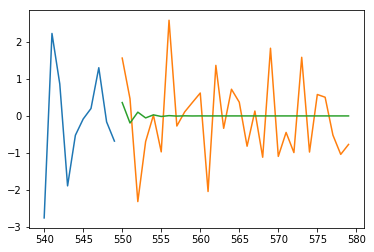

setting 1 1
[-1.49197653e-05 -8.98588648e-02 -9.99945139e-01]
aic: 1572.2225299984736 bic: 1589.4622031113797


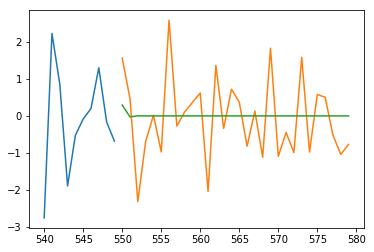

setting 1 2
[ 7.21673600e-05  8.85732442e-01 -1.96477200e+00  9.64773231e-01]
aic: 1560.666618456009 bic: 1582.2162098471415


D:\anaconda\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


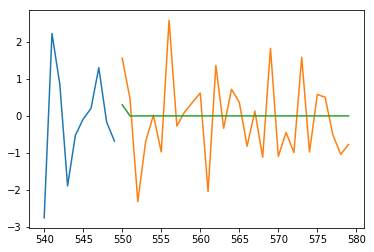

setting 1 3
[-1.74183189e-05 -9.25366088e-01 -1.69936468e-01 -9.09628201e-01
  8.08619238e-02]
aic: 1575.7538971878605 bic: 1601.6134068572196


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


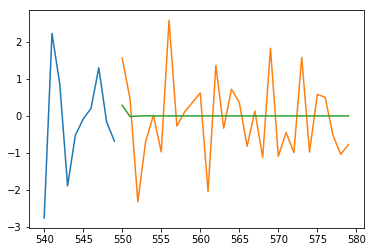

setting 1 4
[-1.35145627e-05 -8.96283329e-01 -2.01841073e-01 -9.22850101e-01
  7.46611088e-02  5.07859327e-02]
aic: 1576.472803740765 bic: 1606.6422316883504


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


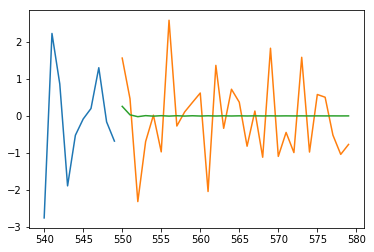

setting 1 5


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-1.45069610e-05 -9.21888504e-01 -1.81440988e-01 -9.48542951e-01
  3.14813141e-02  4.18393756e-02  5.76514804e-02]
aic: 1577.0753731674517 bic: 1611.554719393264


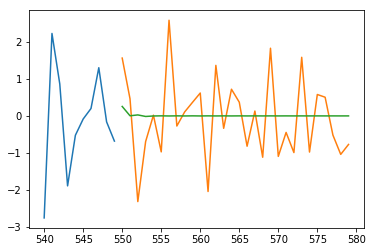

setting 2 0
[-1.52407349e-05 -7.06172442e-01 -3.29883438e-01]
aic: 1754.0680183712075 bic: 1771.3076914841135


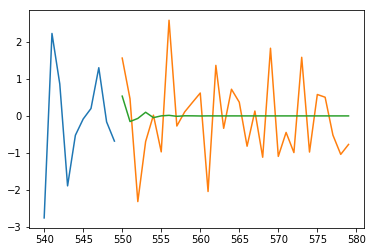

setting 2 1
[-1.50901738e-05 -9.25815828e-02 -2.99077142e-02 -9.99987042e-01]
aic: 1573.7296086834115 bic: 1595.279200074544


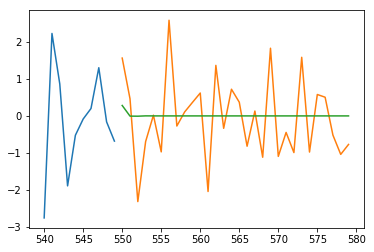

setting 2 2
[-1.53027275e-05 -8.13676519e-01 -6.47423443e-02 -2.76094085e-01
 -7.23905898e-01]
aic: 1576.2223066259453 bic: 1602.0818162953044


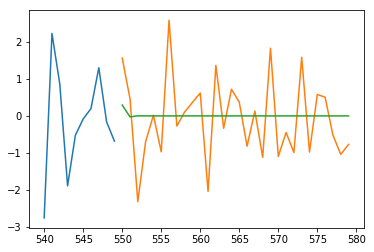

setting 2 3
[ 2.19650272e-05 -9.51409053e-02  8.67378995e-01 -1.00034630e+00
 -9.62562496e-01  9.62909248e-01]
aic: 1562.634312652503 bic: 1592.8037406000885


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


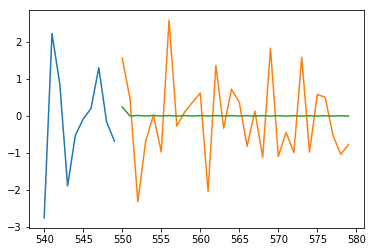

setting 2 4
[-1.77645100e-05 -1.32491587e+00 -9.74642873e-01  2.29938434e-01
 -3.62874544e-01 -9.55416335e-01  8.83539823e-02]
aic: 1576.308508628963 bic: 1610.787854854775


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


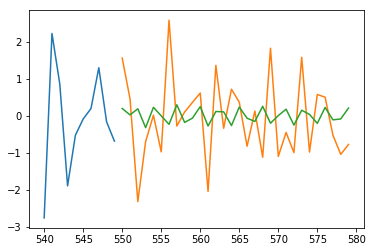

setting 2 5


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-1.12741606e-05 -1.31551493e+00 -9.65385097e-01  2.23701162e-01
 -4.17596184e-01 -9.68250331e-01  1.06313785e-01  5.58322040e-02]
aic: 1577.6200151566584 bic: 1616.409279660697


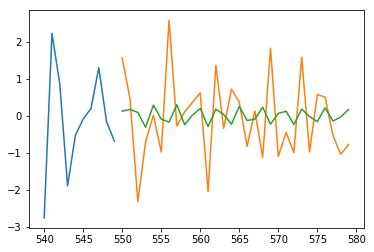

setting 3 0
[-2.58968590e-04 -7.90016277e-01 -5.08959734e-01 -2.53515403e-01]
aic: 1719.5172381100538 bic: 1741.0668295011862


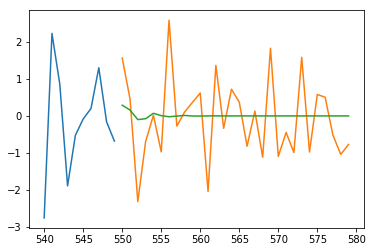

setting 3 1
[-1.59555366e-05 -9.43807970e-02 -3.53220474e-02 -5.66769207e-02
 -9.99799613e-01]
aic: 1573.969875811881 bic: 1599.82938548124


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


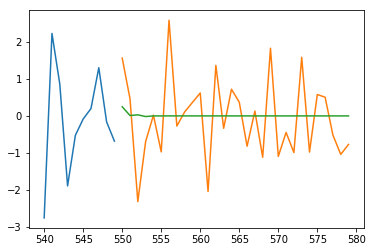

setting 3 2
[-1.49086725e-05 -9.83813320e-01 -1.14008753e-01 -4.29630393e-02
 -1.07517864e-01 -8.91156391e-01]
aic: 1577.0438275401193 bic: 1607.2132554877048


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


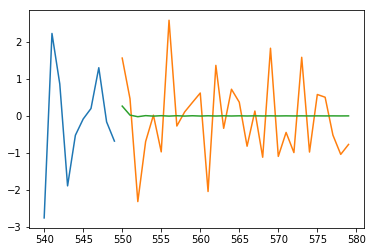

setting 3 3


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[ 3.60778484e-05 -1.87607366e+00 -1.13610857e+00 -9.49806246e-02
  7.89431360e-01 -8.09630146e-01 -9.77504014e-01]
aic: 1576.6152245525589 bic: 1611.094570778371


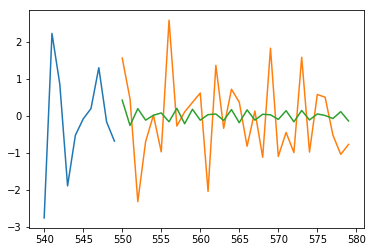

setting 3 4


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-1.96227810e-05 -1.39191637e+00 -1.43330633e+00 -9.01712713e-01
  3.81423043e-01  6.38770306e-02 -5.53024592e-01 -8.78391748e-01]
aic: 1580.4971601218685 bic: 1619.286424625907


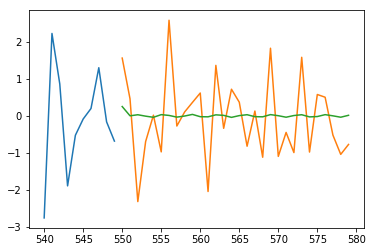

setting 3 5


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-1.78460332e-05 -1.39951815e+00 -1.43631002e+00 -9.09868531e-01
  3.13157277e-01  1.12104773e-02 -5.45420668e-01 -8.53577284e-01
  8.63338370e-02]
aic: 1578.5917213449463 bic: 1621.6909041272115


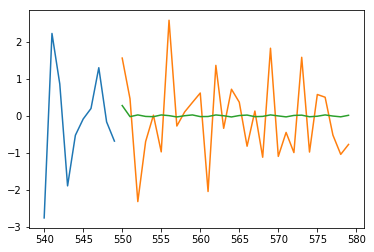

setting 4 0
[-5.49704808e-04 -8.49752961e-01 -6.28889278e-01 -4.39358655e-01
 -2.34656582e-01]
aic: 1690.338310778423 bic: 1716.197820447782


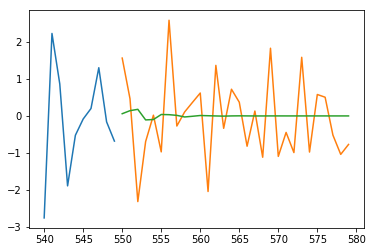

setting 4 1


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-1.46712429e-05 -9.76633456e-02 -3.74227496e-02 -6.15346306e-02
 -5.24825069e-02 -9.99919578e-01]
aic: 1574.4517752619938 bic: 1604.6212032095793


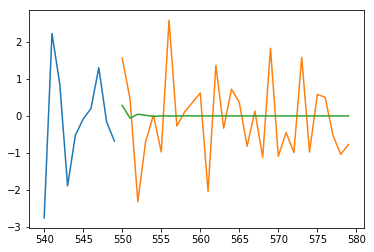

setting 4 2


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[ 9.94084351e-06  8.52970197e-01  3.17366170e-02 -2.45379431e-02
  2.93458469e-02 -1.97679896e+00  9.76798956e-01]
aic: 1564.2801346583221 bic: 1598.7594808841343


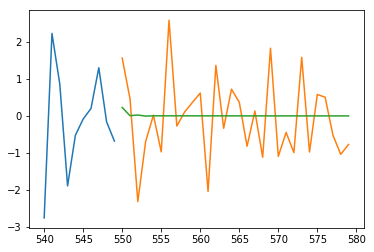

setting 4 3


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-2.51408217e-05  3.89561354e-01 -8.48106946e-01 -1.18885522e-01
 -4.25347589e-02 -1.48401285e+00  1.33771442e+00 -8.53701564e-01]
aic: 1574.6356719424696 bic: 1613.4249364465081


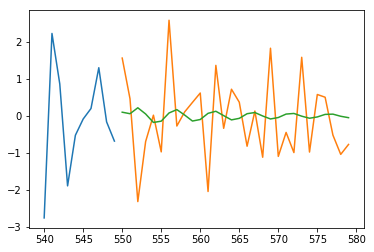

setting 4 4


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-1.84900240e-05  6.11108720e-02 -7.11490550e-01 -3.42895404e-01
 -7.70364894e-02 -1.15860307e+00  8.65565930e-01 -4.71635156e-01
 -2.35327646e-01]
aic: 1576.3692767370044 bic: 1619.4684595192696


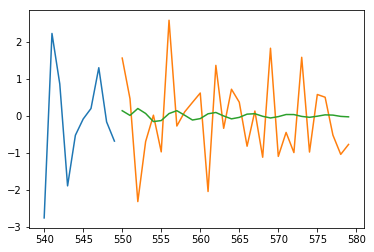

setting 4 5
[ 4.00256519e-05  4.79874627e-01 -1.31034113e-01 -3.89376993e-01
  7.83056443e-01 -1.56873069e+00  7.07957035e-01  1.49328641e-01
 -1.13421640e+00  8.45662091e-01]
aic: 1565.9996699973358 bic: 1613.4087710578274


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


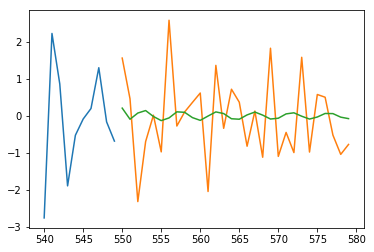

setting 5 0
[-6.26750114e-04 -8.95801208e-01 -7.15155732e-01 -5.62493044e-01
 -4.01242813e-01 -1.95403049e-01]
aic: 1670.9555995910355 bic: 1701.125027538621


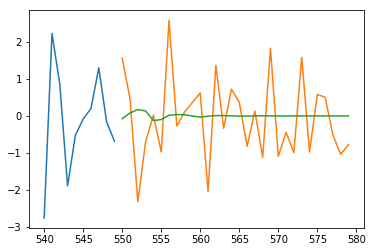

setting 5 1
[-1.39317703e-05 -9.84621826e-02 -3.83825942e-02 -6.22122688e-02
 -5.37706943e-02 -1.29463461e-02 -9.99888620e-01]
aic: 1576.365105780238 bic: 1610.8444520060502


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


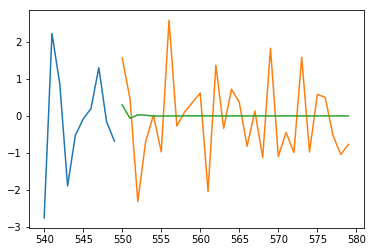

setting 5 2
[-1.47920830e-05 -1.04484874e+00 -1.30110958e-01 -9.55917858e-02
 -1.12328012e-01 -5.95985014e-02 -5.43615465e-02 -9.45474904e-01]
aic: 1578.1295173082726 bic: 1616.9187818123112


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


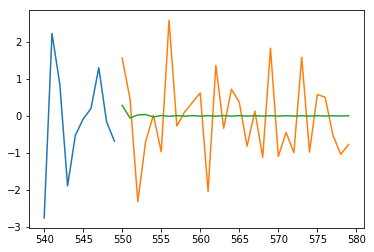

setting 5 3


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-1.39168888e-05 -1.28112723e+00 -4.00477779e-01 -1.29220170e-01
 -1.38403879e-01 -7.97622214e-02  1.85389526e-01 -9.34548122e-01
 -2.50841404e-01]
aic: 1579.706271298768 bic: 1622.805454081033


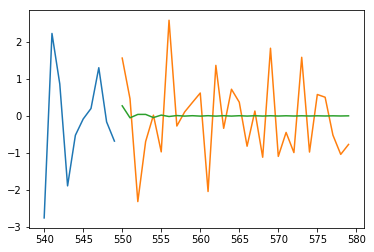

setting 5 4
[-3.58587686e-06 -1.09710615e+00  6.33174494e-01  8.63470959e-01
  4.13448659e-02 -3.97344626e-02 -4.72334449e-02 -1.77610988e+00
 -2.55641799e-02  8.48930890e-01]
aic: 1571.7610614107916 bic: 1619.1701624712832


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


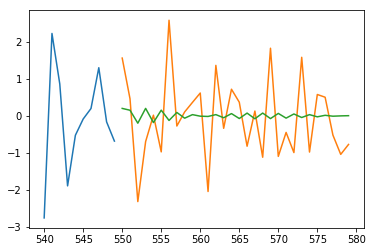

setting 5 5


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-2.00245200e-05 -1.12168859e+00 -5.58898117e-01 -1.09953612e+00
 -8.13235336e-01 -9.71424306e-02  2.28131633e-02 -6.03227548e-01
  5.64057346e-01 -3.23668215e-01 -6.59261261e-01]
aic: 1580.6258201177943 bic: 1632.3448394565125


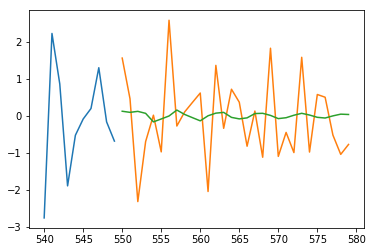

In [17]:
for i in range(m):
    for j in range(n):
        print(f'setting {i} {j}')
        if i == 0 and  j == 0:
            continue
        try:
            arma_mod = sm.tsa.ARMA(X, (i,j)).fit(disp=False)
        except (ValueError,np.linalg.LinAlgError):
            print('invaild setting skip')
            continue
        
        print(arma_mod.params)
        print(f'aic: {arma_mod.aic} bic: {arma_mod.bic}')
        aic_mat[i,j] = arma_mod.aic
        bic_mat[i,j] = arma_mod.bic
        
        plt.plot(np.arange(cut-10,cut),X[-10:])
        plt.plot(np.arange(cut,end),Y)
        plt.plot(np.arange(cut,end),arma_mod.predict(start=cut,end=end-1))
        plt.show()

利用BIC原则：https://en.wikipedia.org/wiki/Bayesian_information_criterion

In [18]:
bic_mat

array([[          inf, 1587.60584402,           inf,           inf,
                  inf,           inf],
       [1828.51076295, 1589.46220311, 1582.21620985, 1601.61340686,
        1606.64223169, 1611.55471939],
       [1771.30769148, 1595.27920007, 1602.0818163 , 1592.8037406 ,
        1610.78785485, 1616.40927966],
       [1741.0668295 , 1599.82938548, 1607.21325549, 1611.09457078,
        1619.28642463, 1621.69090413],
       [1716.19782045, 1604.62120321, 1598.75948088, 1613.42493645,
        1619.46845952, 1613.40877106],
       [1701.12502754, 1610.84445201, 1616.91878181, 1622.80545408,
        1619.17016247, 1632.34483946]])

In [19]:
np.unravel_index(bic_mat.argmin(), bic_mat.shape)

(1, 2)

所以最优模型是ARMA(1,2),可以注意ARMA(1,2)的条件期望和真实结果一点都不像，这是因为条件期望作为预测与其说是预测真实曲线什么样子，
不如说是根据所拟合的模型对后面所可能产生的各种曲线的概率分布的一种属性的描述，因为移除了估计的波动性所以肯定会振幅越来越小趋于均值。

可以看另外两种图了解所估计的统计模型之性质，一个是只预测一步，把测试数据也加进来。一个是看看这个模型的模拟结果。

In [20]:
arma_model = arma_mod = sm.tsa.ARMA(X, (1,2)).fit(disp=False)

D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\anaconda\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:
arma_model.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
D:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarn

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  550
Model:                     ARMA(1, 2)   Log Likelihood                -775.333
Method:                       css-mle   S.D. of innovations              0.983
Date:                Thu, 19 Jul 2018   AIC                           1560.667
Time:                        12:30:24   BIC                           1582.216
Sample:                             0   HQIC                          1569.088
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.217e-05   9.29e-05      0.777      0.438      -0.000       0.000
ar.L1.y        0.8857      0.023     39.100      0.000       0.841       0.930
ma.L1.y       -1.9648        nan        nan        nan         nan         nan
ma.L2.y        0.9648        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1290           +0.0000j            1.1290            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.0365           +0.0000j            1.0365            0.0000
-----------------------------------------------------------------------------
"""

In [22]:
arma_model.sigma2

0.9658862868090695

模型形式为

$$
\begin{align*}
y_t &= 0.8857 y_{t-1} -1.9648 \epsilon_{t-1} + 0.9648 \epsilon_{t-2} + \epsilon_t \\
\epsilon_t &\sim N(0,0.983^2) \quad \text{i.i.d}
\end{align*}
$$

In [23]:
arma_model.sigma2

0.9658862868090695

In [24]:
arma_model.params

array([ 7.21673600e-05,  8.85732442e-01, -1.96477200e+00,  9.64773231e-01])

In [25]:
c ,phi1, theta1, theta2 = arma_model.params
sigma = np.sqrt(arma_model.sigma2)

D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


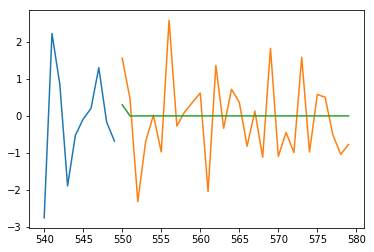

In [26]:
plt.plot(np.arange(cut-10,cut),X[-10:])
plt.plot(np.arange(cut,end),Y)
plt.plot(np.arange(cut,end),arma_mod.predict(start=cut,end=end-1))
plt.show()

In [27]:
epsilon = np.random.rand(30) * sigma
epsilon

array([0.32785051, 0.161839  , 0.31178815, 0.36002051, 0.80017836,
       0.38447858, 0.42408158, 0.24038303, 0.7152639 , 0.10436438,
       0.49374806, 0.49948967, 0.13641902, 0.51365548, 0.09899136,
       0.71261576, 0.38950149, 0.43869848, 0.11687837, 0.69956464,
       0.12959402, 0.61707135, 0.130719  , 0.47377013, 0.18362246,
       0.33182906, 0.78274552, 0.5926662 , 0.31543741, 0.69704319])

In [28]:
y = np.zeros(30)
y[0] = np.nan

In [29]:
for i in range(2,30):
    y[i] = phi1 * y[i-1] + theta1 * epsilon[i-1] + theta2 * epsilon[i-2] + epsilon[i]

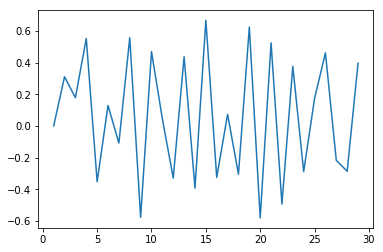

In [30]:
plt.plot(y)
plt.show()

In [31]:
(X - arma_model.predict())[-10:]

D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([-1.41267676,  0.68998689,  1.60468684, -0.16764006, -0.72368393,
       -0.87912866, -0.75500102,  0.4885038 ,  0.37209072, -0.27758129])

In [32]:
sim_len = 20

epsilon = np.r_[arma_model.resid.copy(),np.random.randn(sim_len)*sigma]
sim_y = np.r_[X.copy(),np.zeros(sim_len)]

D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [33]:
epsilon[-30:]

array([-1.41267676,  0.68998689,  1.60468684, -0.16764006, -0.72368393,
       -0.87912866, -0.75500102,  0.4885038 ,  0.37209072, -0.27758129,
       -1.43699688,  1.02441186,  0.69726655, -1.64630463,  0.30681566,
       -0.7987293 ,  2.80548153,  1.27983431, -0.92738149,  1.63077443,
        0.40780914, -0.67739663, -0.3948167 , -0.22207136,  2.31146714,
       -1.35458017, -0.43518143, -1.64740673, -0.5227715 ,  0.23067191])

In [34]:
for i in range(cut,cut+sim_len):
    sim_y[i] = phi1 * sim_y[i-1] + theta1 * epsilon[i-1] + theta2 * epsilon[i-2] + epsilon[i]

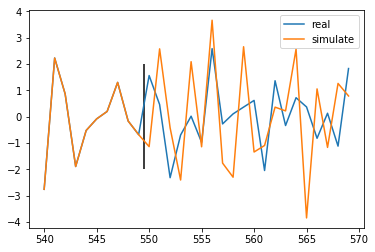

In [35]:
idx = np.arange(cut-10,cut+sim_len)
plt.plot(idx,np.r_[X[-10:],Y[:sim_len]],label='real')
plt.plot(idx,sim_y[-sim_len-10:],label='simulate')
plt.vlines(cut-0.5,-2,2)
plt.legend()
plt.show()

这只是一次模拟，不同次模拟会模拟出不同的曲线，条件期望预测只是对这些曲线的随机性质的描述而已。